In [54]:
# HHL figure defaults 
# updated December 2024
import numpy as np
import matplotlib

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import protfasta
from sparrow import Protein
from scipy.stats import mannwhitneyu
from itertools import combinations



import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.25

# set default plot line width
matplotlib.rcParams['lines.linewidth'] = 0.5

# xtick and y axis sizes
matplotlib.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
matplotlib.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
matplotlib.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
matplotlib.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

# xtick and y axis sizes
matplotlib.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
matplotlib.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
matplotlib.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
matplotlib.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis

# reduce padding
matplotlib.rcParams['xtick.major.pad'] = 1
matplotlib.rcParams['ytick.major.pad'] = 1


# **Set font sizes for ticks, labels, and legend**
matplotlib.rcParams['xtick.labelsize'] = 8  # Font size for x-tick labels
matplotlib.rcParams['ytick.labelsize'] = 8  # Font size for y-tick labels
matplotlib.rcParams['axes.labelsize'] = 10  # Font size for x-axis and y-	axis labels
matplotlib.rcParams['legend.fontsize'] = 8  # Font size for legend text

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

# make single figures with
# figure(None, (3,2), dpi=350)


In [56]:
# read in the sequences for the different groups just to check everything seems good...

all_seqs = protfasta.read_fasta('seqs_data_run.fasta')
for k in all_seqs:
    Protein(all_seqs[k][0:49]).show_sequence(bold_positions=[32,33,34,35,36,37,38,39,40,41],blocksize=50)

print('\nT11')
all_seqs = protfasta.read_fasta('seqs_data_run_T11.fasta')
for k in all_seqs:
    Protein(all_seqs[k][0:49]).show_sequence(bold_positions=[7,9,10,11,12,13,14,15,16],blocksize=50)

print('\nWT to T11')
all_seqs = protfasta.read_fasta('seqs_data_run_WT_to_T11.fasta')
for k in all_seqs:
    Protein(all_seqs[k][0:49]).show_sequence(bold_positions=[7,9,10,11,12,13,14,15,16],blocksize=50)    


T11



WT to T11


In [33]:
# get the wt Ka values (needed to calculated the Ka*
all_wt_Ka_vals = []
for i in range(1,6):
    with open(f'../../Figure_2/Analysis/Data/SCO2_{i}_Ka.csv','r') as fh:
        content = fh.readlines()
        all_wt_Ka_vals.extend([float(i.strip()) for i in content[1:]])

wt_ka = np.mean(all_wt_Ka_vals)


In [57]:
# read in the actual Ka values
all_data = {}
names = ['run', 'run_T11', 'run_WT_to_T11']
for n in names:
    seq2scores = {}
    for i in range(1, 21):
        with open(f'Data_{n}/S{i}_2_Ka.csv') as fh:
            content = fh.readlines()
        vals = [float(i) for i in content[1:]]
        seq2scores[i] = vals
    all_data[n] = seq2scores
    

In [68]:
# get RBD only Ka* value
with open('Data_run/WT_RBD_2_Ka.csv','r') as fh:
    content = fh.readlines()

# nb see we divide by wt_ka here
RBD_only_KA = np.mean([float(i) for i in content[1:]])/wt_ka



In [35]:
# convert to a mea 
mean_wt_ka_star        = np.array([np.mean(all_data['run'][k]) for k in all_data['run']])/wt_ka
mean_t11_ka_star       = np.array([np.mean(all_data['run_T11'][k]) for k in all_data['run']])/wt_ka
mean_wt_to_t11_ka_star = np.array([np.mean(all_data['run_WT_to_T11'][k]) for k in all_data['run']])/wt_ka

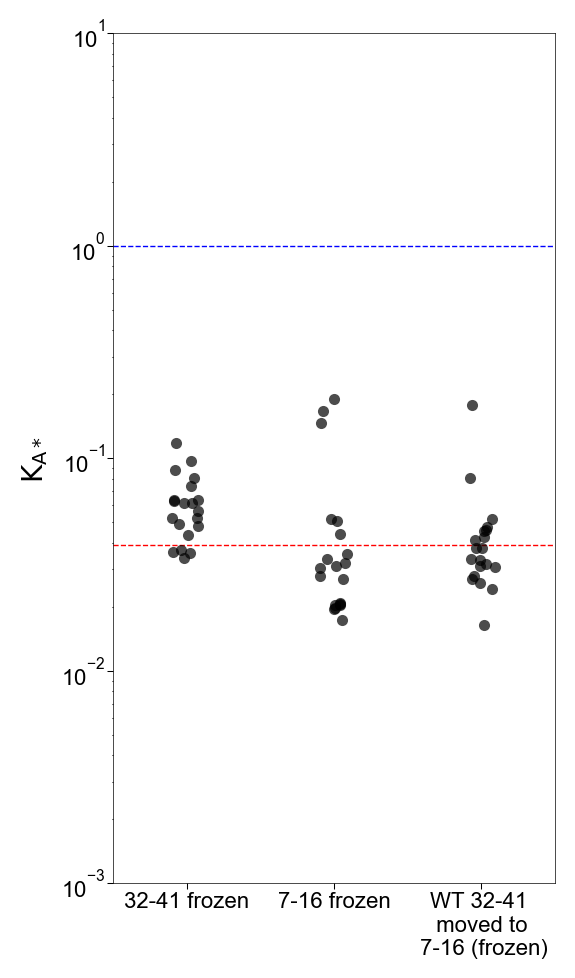

In [80]:
# Create a DataFrame in long format
df = pd.DataFrame({
    'value': list(mean_wt_ka_star) + list(mean_t11_ka_star) + list(mean_wt_to_t11_ka_star),
    'group': ['32-41 frozen'] * 20 + ['7-16 frozen'] * 20 + ['WT 32-41 \n moved to \n 7-16 (frozen)'] * 20
})

# Create the swarm plot
plt.figure(figsize=(3, 5))
ax = plt.gca()


sns.stripplot(data=df, x='group', y='value', size=4, jitter=True, alpha=0.7, color='k')

ax.axhline(RBD_only_KA, color='r', ls='--')
ax.axhline(1, color='b', ls='--')

# Overlay means


plt.ylabel(r"$ \rm K_{A*}$")
plt.xlabel("")
plt.yscale('log')
plt.ylim([0.001,10])
plt.tight_layout()


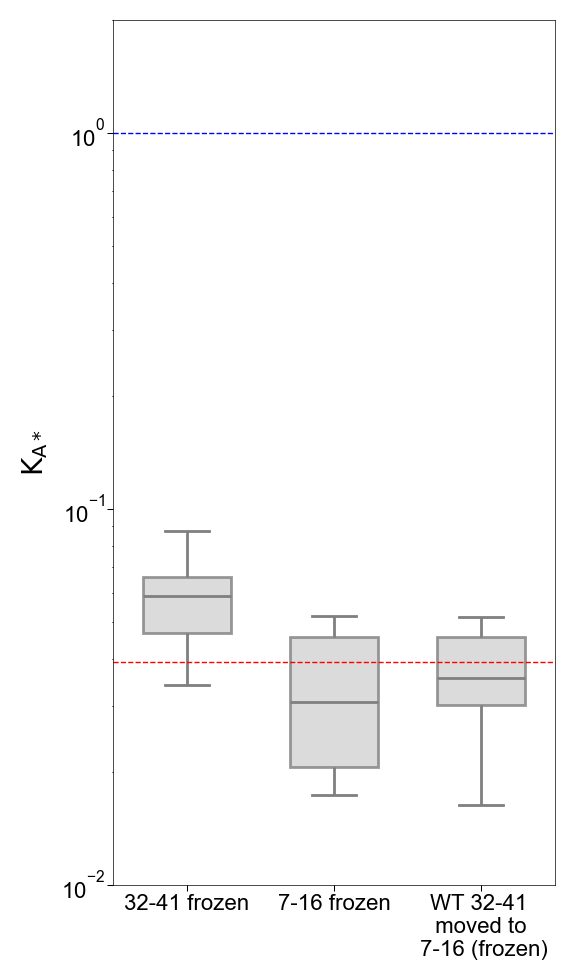

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame in long format
df = pd.DataFrame({
    'value': list(mean_wt_ka_star) + list(mean_t11_ka_star) + list(mean_wt_to_t11_ka_star),
    'group': ['32-41 frozen'] * 20 + ['7-16 frozen'] * 20 + ['WT 32-41 \n moved to \n 7-16 (frozen)'] * 20
})

plt.figure(figsize=(3, 5))
ax = plt.gca()

# Box plot with log-scaled y-axis
sns.boxplot(data=df, x='group', y='value', color='lightgray', fliersize=0, width=0.6, boxprops=dict(alpha=0.8))


# Horizontal reference lines
ax.axhline(RBD_only_KA, color='r', ls='--')
ax.axhline(1, color='b', ls='--')

plt.ylabel(r"$ \rm K_{A*}$")
plt.xlabel("")
plt.yscale('log')
plt.ylim([0.01, 2])
plt.tight_layout()

In [86]:
# define data for doing MW
groups = {
    '32-41 frozen': mean_wt,
    '7-16 frozen': mean_t11,
    'WT 32-41 moved and frozne': mean_wt_to_t11
}

# Perform pairwise Mann-Whitney U tests
results = []
group_names = list(groups.keys())
for g1, g2 in combinations(group_names, 2):
    stat, p = mannwhitneyu(groups[g1], groups[g2], alternative='two-sided')
    results.append({
        'comparison': f'{g1} vs {g2}',
        'U': stat,
        'raw_p': p
    })

# Bonferroni correction
n_tests = len(results)
for r in results:
    r['bonferroni_p'] = min(r['raw_p'] * n_tests, 1.0)

# Print results
for r in results:
    print(f"{r['comparison']}: U = {r['U']:.2f}, raw p = {r['raw_p']:.3e}, Bonferroni-corrected p = {r['bonferroni_p']:.3e}")

32-41 frozen vs 7-16 frozen: U = 320.00, raw p = 1.227e-03, Bonferroni-corrected p = 3.682e-03
32-41 frozen vs WT 32-41 moved and frozne: U = 325.00, raw p = 7.579e-04, Bonferroni-corrected p = 2.274e-03
7-16 frozen vs WT 32-41 moved and frozne: U = 160.00, raw p = 2.853e-01, Bonferroni-corrected p = 8.559e-01
